In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Fruits.csv")

In [3]:
df

,Fruit,Temp,Humidity,CO2,Days,Spoiled
0,Banana,24,60,401,5,Yes
1,Banana,22,55,399,6,Yes
2,Banana,25,50,400,5,Yes
3,Banana,21,45,398,7,Yes
4,Banana,19,52,403,7,Yes
...,...,...,...,...,...,...
245,Lemon,22,69,398,5,No
246,Lemon,23,70,400,4,No
247,Lemon,24,72,401,3,No
248,Lemon,21,76,404,4,No


In [4]:
df1 = df.sample(frac=1)

In [5]:
df1

,Fruit,Temp,Humidity,CO2,Days,Spoiled
107,Banana,18,58,410,5,No
1,Banana,22,55,399,6,Yes
44,Plum,23,68,399,4,Yes
67,Tomato,22,55,419,6,Yes
45,Plum,22,53,400,5,Yes
...,...,...,...,...,...,...
174,Plum,23,68,399,3,No
239,Lemon,22,68,402,5,No
157,Papaya,19,67,402,5,No
136,Mango,25,57,404,7,No


In [6]:
df1.to_csv('file1.csv')

In [7]:
df2 = pd.read_csv("file1.csv")

In [8]:
df2

,Unnamed: 0,Fruit,Temp,Humidity,CO2,Days,Spoiled
0,107,Banana,18,58,410,5,No
1,1,Banana,22,55,399,6,Yes
2,44,Plum,23,68,399,4,Yes
3,67,Tomato,22,55,419,6,Yes
4,45,Plum,22,53,400,5,Yes
...,...,...,...,...,...,...,...
245,174,Plum,23,68,399,3,No
246,239,Lemon,22,68,402,5,No
247,157,Papaya,19,67,402,5,No
248,136,Mango,25,57,404,7,No


In [9]:
df2.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df2

,Fruit,Temp,Humidity,CO2,Days,Spoiled
0,Banana,18,58,410,5,No
1,Banana,22,55,399,6,Yes
2,Plum,23,68,399,4,Yes
3,Tomato,22,55,419,6,Yes
4,Plum,22,53,400,5,Yes
...,...,...,...,...,...,...
245,Plum,23,68,399,3,No
246,Lemon,22,68,402,5,No
247,Papaya,19,67,402,5,No
248,Mango,25,57,404,7,No


In [11]:
Spoil = pd.Series(map(lambda x: dict(Yes=1, No=0)[x],
              df2.Spoiled.values.tolist()), df2.index)
Spoil

0      0
1      1
2      1
3      1
4      1
      ..
245    0
246    0
247    0
248    0
249    0
Length: 250, dtype: int64

In [12]:
df2.drop('Spoiled', axis=1, inplace=True)
df2

,Fruit,Temp,Humidity,CO2,Days
0,Banana,18,58,410,5
1,Banana,22,55,399,6
2,Plum,23,68,399,4
3,Tomato,22,55,419,6
4,Plum,22,53,400,5
...,...,...,...,...,...
245,Plum,23,68,399,3
246,Lemon,22,68,402,5
247,Papaya,19,67,402,5
248,Mango,25,57,404,7


In [13]:
Spoil = pd.Series(map(lambda x: dict(Yes=1, No=0)[x],
              df.Spoiled.values.tolist()), df.index)
df.drop('Spoiled',axis=1,inplace = True)
df

,Fruit,Temp,Humidity,CO2,Days
0,Banana,24,60,401,5
1,Banana,22,55,399,6
2,Banana,25,50,400,5
3,Banana,21,45,398,7
4,Banana,19,52,403,7
...,...,...,...,...,...
245,Lemon,22,69,398,5
246,Lemon,23,70,400,4
247,Lemon,24,72,401,3
248,Lemon,21,76,404,4


In [14]:
df = df.assign(Spoiled=Spoil)
df

,Fruit,Temp,Humidity,CO2,Days,Spoiled
0,Banana,24,60,401,5,1
1,Banana,22,55,399,6,1
2,Banana,25,50,400,5,1
3,Banana,21,45,398,7,1
4,Banana,19,52,403,7,1
...,...,...,...,...,...,...
245,Lemon,22,69,398,5,0
246,Lemon,23,70,400,4,0
247,Lemon,24,72,401,3,0
248,Lemon,21,76,404,4,0


In [15]:
df2 = df.assign(Spoiled=Spoil)
df2
df2.to_csv("File2.csv")

In [16]:
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names= True)
data = encoder.fit_transform(df)
data

,Fruit_Banana,Fruit_Banana,Fruit_Apple,Fruit_Mango,Fruit_Mango,Fruit_Papaya,Fruit_Plum,Fruit_Jackfruit,Fruit_Jackfruit,Fruit_Tomato,Fruit_Grapes,Fruit_Grapes,Fruit_Litchi,Fruit_Lemon,Temp,Humidity,CO2,Days,Spoiled
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,24,60,401,5,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,22,55,399,6,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,25,50,400,5,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,21,45,398,7,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,19,52,403,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,0,0,0,1,22,69,398,5,0
246,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23,70,400,4,0
247,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,72,401,3,0
248,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21,76,404,4,0


In [17]:
X = data.drop('Spoiled',axis = 1).copy()
X

,Fruit_Banana,Fruit_Banana,Fruit_Apple,Fruit_Mango,Fruit_Mango,Fruit_Papaya,Fruit_Plum,Fruit_Jackfruit,Fruit_Jackfruit,Fruit_Tomato,Fruit_Grapes,Fruit_Grapes,Fruit_Litchi,Fruit_Lemon,Temp,Humidity,CO2,Days
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,24,60,401,5
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,22,55,399,6
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,25,50,400,5
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,21,45,398,7
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,19,52,403,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,0,0,0,1,22,69,398,5
246,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23,70,400,4
247,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,72,401,3
248,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21,76,404,4


In [18]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

scale.fit(data[['Temp']])
data['Temp']=scale.transform(data[['Temp']])
scale.fit(df[['Humidity']])
data['Humidity']=scale.transform(data[['Humidity']])
scale.fit(data[['CO2']])
data['CO2']=scale.transform(data[['CO2']])


data

,Fruit_Banana,Fruit_Banana,Fruit_Apple,Fruit_Mango,Fruit_Mango,Fruit_Papaya,Fruit_Plum,Fruit_Jackfruit,Fruit_Jackfruit,Fruit_Tomato,Fruit_Grapes,Fruit_Grapes,Fruit_Litchi,Fruit_Lemon,Temp,Humidity,CO2,Days,Spoiled
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.538462,0.485714,0.24,5,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.384615,0.342857,0.16,6,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.615385,0.200000,0.20,5,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.307692,0.057143,0.12,7,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.153846,0.257143,0.32,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.384615,0.742857,0.12,5,0
246,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.461538,0.771429,0.20,4,0
247,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.538462,0.828571,0.24,3,0
248,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.307692,0.942857,0.36,4,0


In [19]:
X = data.drop('Spoiled',axis = 1).copy()
X

,Fruit_Banana,Fruit_Banana,Fruit_Apple,Fruit_Mango,Fruit_Mango,Fruit_Papaya,Fruit_Plum,Fruit_Jackfruit,Fruit_Jackfruit,Fruit_Tomato,Fruit_Grapes,Fruit_Grapes,Fruit_Litchi,Fruit_Lemon,Temp,Humidity,CO2,Days
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.538462,0.485714,0.24,5
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.384615,0.342857,0.16,6
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.615385,0.200000,0.20,5
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.307692,0.057143,0.12,7
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.153846,0.257143,0.32,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.384615,0.742857,0.12,5
246,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.461538,0.771429,0.20,4
247,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.538462,0.828571,0.24,3
248,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.307692,0.942857,0.36,4


In [20]:
y = data['Spoiled'].copy()
y 

0      1
1      1
2      1
3      1
4      1
      ..
245    0
246    0
247    0
248    0
249    0
Name: Spoiled, Length: 250, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [22]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

0.72

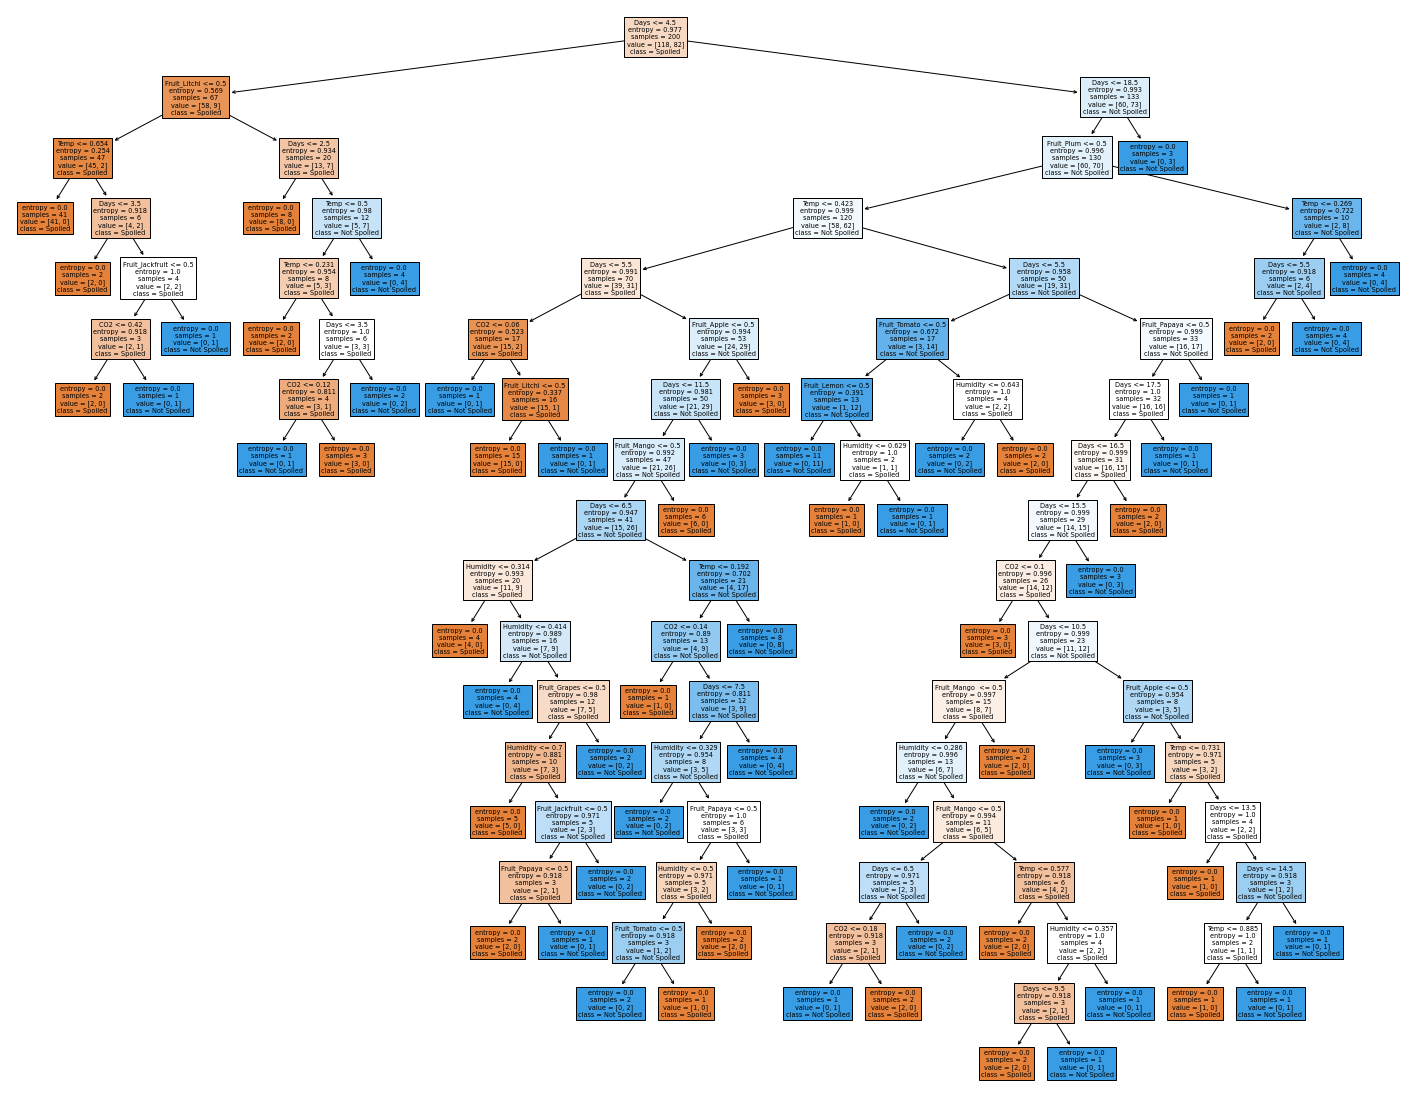

In [24]:
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier,
                   feature_names=X.columns,
                   class_names=['Spoiled', "Not Spoiled"],
                   filled=True)

In [25]:
param_dist = {
    "criterion": ['gini','entropy'],
    "max_depth": range(1,15),
    "min_samples_split":range(1,20),
    "min_samples_leaf":range(1,10)
}

In [26]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(classifier,param_grid = param_dist,cv=10,n_jobs = -1,verbose = 0)

In [27]:
grid.fit(X_train,y_train)

C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2520 fits failed out of a total of 47880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2520 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    check_scalar(
  File "C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 20)})

In [28]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=10,
                       random_state=0)

In [29]:
grid.best_score_

0.6599999999999999

In [30]:
grid.fit(X_test,y_test)

KeyboardInterrupt: 

In [ ]:
grid.best_score_

In [ ]:
clf= DecisionTreeClassifier(criterion='entropy', random_state=0)  
clf.fit(X_train, y_train)  

In [ ]:
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

In [ ]:
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, imourutues = path.ccp_alphas, path.impurities
ccp_alphas

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    classifier = DecisionTreeClassifier(max_depth = 2,random_state = 0, ccp_alpha = ccp_alpha)
    classifier.fit(X_train,y_train)
    clfs.append(classifier)
clfs

In [ ]:
train_accuracy = []
test_accuracy = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_accuracy.append(accuracy_score(y_train,y_train_pred))
    test_accuracy.append(accuracy_score(y_test,y_test_pred))
plt.scatter(ccp_alphas,train_accuracy)
plt.scatter(ccp_alphas,test_accuracy)
plt.plot(ccp_alphas,train_accuracy,label = 'accuracy_train',drawstyle = "steps-post")
plt.plot(ccp_alphas,test_accuracy,label = 'accuracy_test',drawstyle = "steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [ ]:
cl = DecisionTreeClassifier(max_depth = 2 ,random_state =0,ccp_alpha = 0)
cl.fit(X_train,y_train)
y_train_pred = cl.predict(X_train)
y_test_pred = cl.predict(X_test)

accuracy_train_score = accuracy_score(y_train,y_train_pred)
accuracy_train_score

In [ ]:
accuracy_test_score = accuracy_score(y_test,y_test_pred)
accuracy_test_score

AxesSubplot(0.125,0.125;0.62x0.755)


Text(33.0, 0.5, 'Truth')

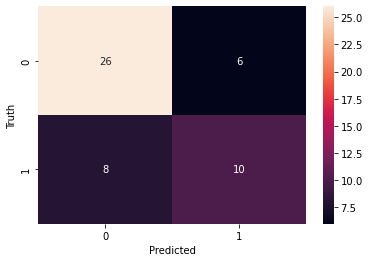

In [32]:
from sklearn.metrics import classification_report, confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.heatmap(confusion_matrix(y_test,y_pred),annot=True))
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        32
           1       0.62      0.56      0.59        18

    accuracy                           0.72        50
   macro avg       0.69      0.68      0.69        50
weighted avg       0.71      0.72      0.72        50

